In [154]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [155]:
N = 45
data = torch.zeros(N)
torch.manual_seed(101)
for i in range(N):
    data[i] = torch.randn(1)*(-1)**i
    
data

tensor([-1.3905,  0.8152, -0.3204, -0.7377, -1.7534, -0.6033, -0.2520,  0.4373,
        -0.5728,  3.2023,  0.5633, -0.2153, -2.1962,  0.2166, -0.7262, -1.8464,
         0.2487, -0.2779,  1.6179,  0.2337, -1.3387,  0.0620, -0.2693, -0.8990,
         0.7997,  0.5125, -0.4176, -0.8493,  1.9849,  1.2697,  0.8975, -1.0640,
        -0.7178, -1.1379, -1.6808, -0.0898, -0.1641,  1.0120,  0.3947, -0.5781,
         1.3596,  0.3860, -0.6011,  1.4371,  0.1779])

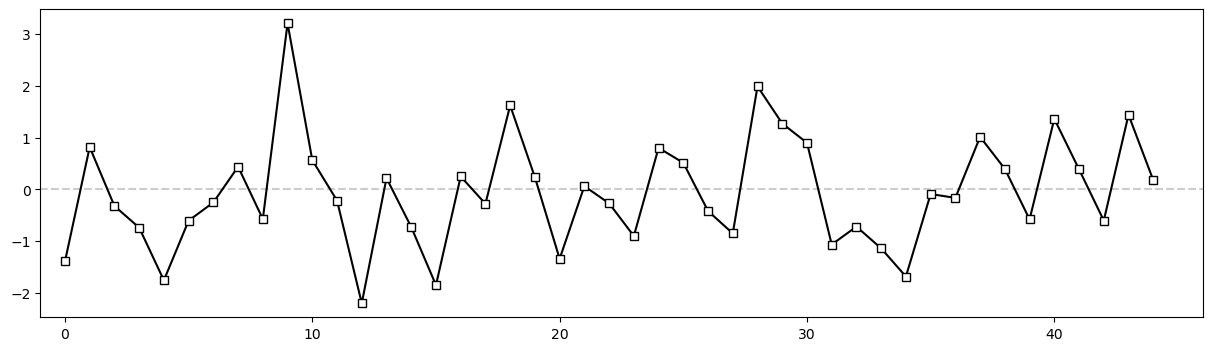

In [156]:
plt.figure(figsize=(15,4))
plt.plot([-1,N+1],[0,0],'--',color=[.8,.8,.8])
plt.plot(data,'ks-',markerfacecolor='w')
plt.xlim([-1,N+1]);

In [157]:
input_size = 1
hidden_size = 16
num_layers = 2
seq_length = 5  
batchsize = 1
epochs = 101
lr = 0.01

In [158]:
X, y = [], []
for i in range(N - seq_length):
    X.append(data[i:i+seq_length]) 
    y.append(data[i+seq_length]) 

In [159]:
X

[tensor([-1.3905,  0.8152, -0.3204, -0.7377, -1.7534]),
 tensor([ 0.8152, -0.3204, -0.7377, -1.7534, -0.6033]),
 tensor([-0.3204, -0.7377, -1.7534, -0.6033, -0.2520]),
 tensor([-0.7377, -1.7534, -0.6033, -0.2520,  0.4373]),
 tensor([-1.7534, -0.6033, -0.2520,  0.4373, -0.5728]),
 tensor([-0.6033, -0.2520,  0.4373, -0.5728,  3.2023]),
 tensor([-0.2520,  0.4373, -0.5728,  3.2023,  0.5633]),
 tensor([ 0.4373, -0.5728,  3.2023,  0.5633, -0.2153]),
 tensor([-0.5728,  3.2023,  0.5633, -0.2153, -2.1962]),
 tensor([ 3.2023,  0.5633, -0.2153, -2.1962,  0.2166]),
 tensor([ 0.5633, -0.2153, -2.1962,  0.2166, -0.7262]),
 tensor([-0.2153, -2.1962,  0.2166, -0.7262, -1.8464]),
 tensor([-2.1962,  0.2166, -0.7262, -1.8464,  0.2487]),
 tensor([ 0.2166, -0.7262, -1.8464,  0.2487, -0.2779]),
 tensor([-0.7262, -1.8464,  0.2487, -0.2779,  1.6179]),
 tensor([-1.8464,  0.2487, -0.2779,  1.6179,  0.2337]),
 tensor([ 0.2487, -0.2779,  1.6179,  0.2337, -1.3387]),
 tensor([-0.2779,  1.6179,  0.2337, -1.3387,  0.

In [160]:
X = torch.stack(X).view(-1, seq_length, input_size)  
y = torch.stack(y).view(-1, 1)
X

tensor([[[-1.3905],
         [ 0.8152],
         [-0.3204],
         [-0.7377],
         [-1.7534]],

        [[ 0.8152],
         [-0.3204],
         [-0.7377],
         [-1.7534],
         [-0.6033]],

        [[-0.3204],
         [-0.7377],
         [-1.7534],
         [-0.6033],
         [-0.2520]],

        [[-0.7377],
         [-1.7534],
         [-0.6033],
         [-0.2520],
         [ 0.4373]],

        [[-1.7534],
         [-0.6033],
         [-0.2520],
         [ 0.4373],
         [-0.5728]],

        [[-0.6033],
         [-0.2520],
         [ 0.4373],
         [-0.5728],
         [ 3.2023]],

        [[-0.2520],
         [ 0.4373],
         [-0.5728],
         [ 3.2023],
         [ 0.5633]],

        [[ 0.4373],
         [-0.5728],
         [ 3.2023],
         [ 0.5633],
         [-0.2153]],

        [[-0.5728],
         [ 3.2023],
         [ 0.5633],
         [-0.2153],
         [-2.1962]],

        [[ 3.2023],
         [ 0.5633],
         [-0.2153],
         [-2.1962],
  

In [161]:
class RNNnet(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.out = nn.Linear(hidden_size, 1)  

    def forward(self, x, h):
        y, h = self.rnn(x, h)  
        o = self.out(y[:, -1, :])  
        return o, h

In [162]:
rnn = RNNnet(input_size, hidden_size, num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=lr)

# Training loop
losses = np.zeros(epochs)
for e in range(epochs):
    optimizer.zero_grad()
    h = torch.zeros(num_layers, X.size(0), hidden_size) 
    
    # Forward pass
    y_pred, _ = rnn(X, h)
    loss = criterion(y_pred, y)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Store loss
    losses[e] = loss.item()
    
    if e % 25 == 0:
        print(f'Epoch {e+1}/{epochs}, Loss: {loss.item():.4f}')

Epoch 1/101, Loss: 1.1305
Epoch 26/101, Loss: 0.6809
Epoch 51/101, Loss: 0.0691
Epoch 76/101, Loss: 0.0027
Epoch 101/101, Loss: 0.0001


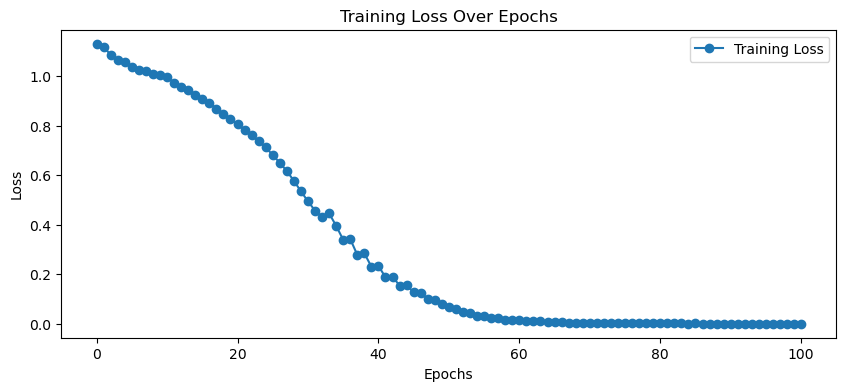

In [163]:
plt.figure(figsize=(10, 4))
plt.plot(losses, 'o-', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training Loss Over Epochs")
plt.show()

In [164]:
predicted_values = []
seq = data[-seq_length:].view(1, seq_length, input_size) 
h = torch.zeros(num_layers, batchsize, hidden_size) 
for _ in range(45):
    y_pred, h = rnn(seq, h)
    predicted_values.append(y_pred.item())
    seq = torch.cat((seq[:, 1:, :], y_pred.view(1, 1, 1)), dim=1)

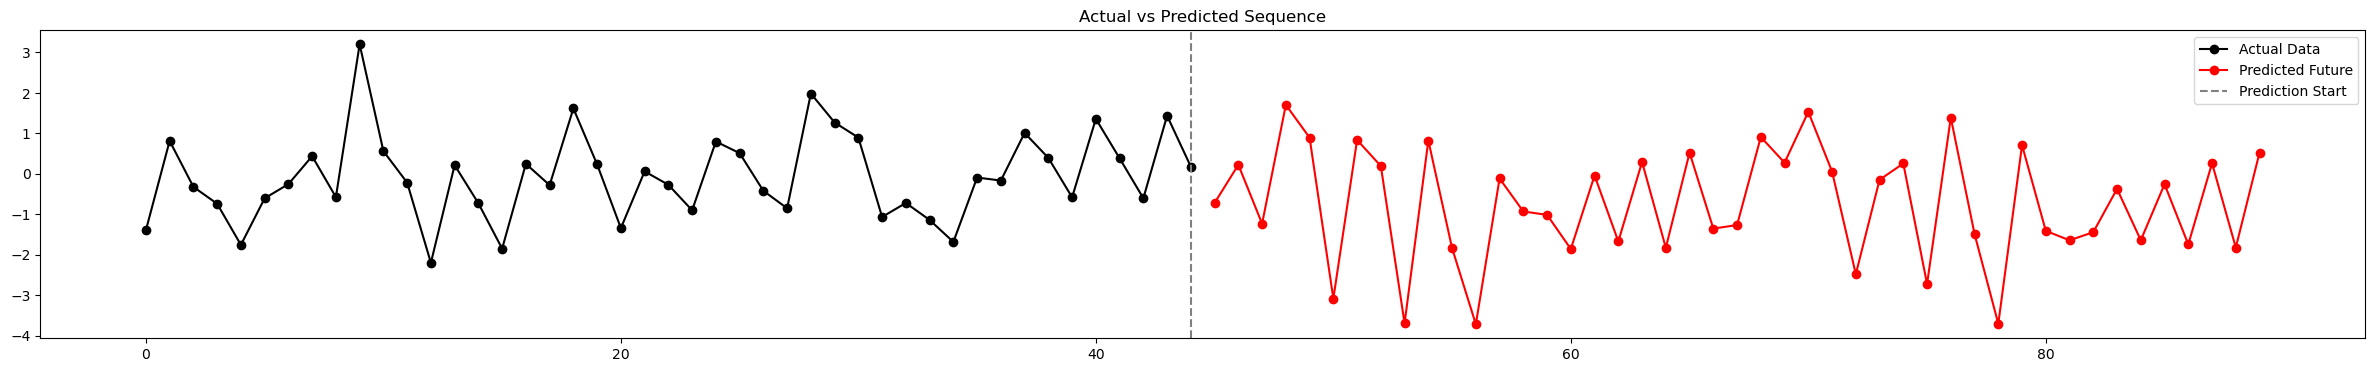

In [165]:
plt.figure(figsize=(30, 4))
plt.plot(range(N), data.numpy(), 'ko-', label="Actual Data")
plt.plot(range(N, N + 45), predicted_values, 'ro-', label="Predicted Future")
plt.axvline(N - 1, linestyle='--', color='gray', label="Prediction Start")
plt.legend()
plt.title("Actual vs Predicted Sequence")
plt.show()